In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## 1. Overview 

* Supervised Learning
    * Regression (predict continuous variable)
        * salary v. years of work experience
        * House prices v square footage
    * Classification (predict discrete variable)
        * spam detection (spam/not spam)
        * image recognition (has feature/does not have feature)
* Unsupervised Learning
    * Clustering
        * Classify users/customers on a retail website        

## 2. Exploring scikit-learn documentation

[scikit-learn](http://scikit-learn.org)

## 3. Getting to know the sklearn API

It comes down to: 

* Instantiate model
* Fit
* Predict

Make some fake data and try it out!

In [16]:
N = 100
x = np.linspace(0,1,N)
y = 3.21*x - 1.05 + np.random.randn(N)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
## Instantiate the model
reg = LinearRegression()

In [19]:
## sklearn models always expect 2D arrays with samples down rows and features/variates along the columns
reg.fit(x.reshape(N,1), y.reshape(N,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
print('Slope =', reg.coef_[0,0]);
print('Intercept =', reg.intercept_[0]);

Slope = 2.88979810874
Intercept = -1.04375975675


In [20]:
## generate new data
X = np.linspace(0,1, 10);
Y = reg.predict(X.reshape(10,1))

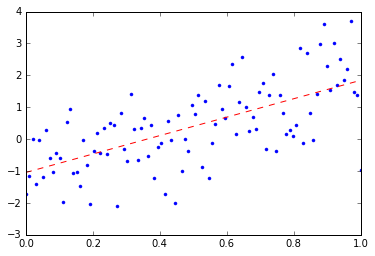

In [23]:
plt.plot(x,y,'b.', X,Y,'r--');

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
clf = DecisionTreeRegressor() # instantiate
clf.fit(x.reshape(N,1), y.reshape(N,1)) # fit

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [51]:
Y_clf = clf.predict(X.reshape(10,1))

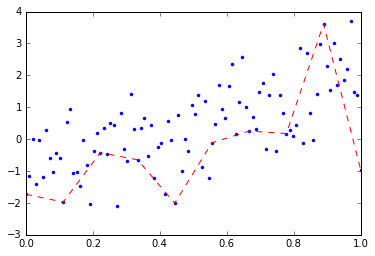

In [54]:
plt.plot(x,y,'b.', X,Y_clf,'r--')

## 4. Examples with built-in datasets

In [55]:
from sklearn.datasets import load_diabetes

In [56]:
diabetes = load_diabetes()

In [57]:
diabetes.keys()

dict_keys(['target', 'data'])

In [58]:
diabetes.data[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

In [59]:
diabetes.target[:5]

array([ 151.,   75.,  141.,  206.,  135.])

In [62]:
## view sex of participants
diabetes.data[:10,1]

array([ 0.05068012, -0.04464164,  0.05068012, -0.04464164, -0.04464164,
       -0.04464164,  0.05068012,  0.05068012,  0.05068012, -0.04464164])

In [63]:
# age, sex, bodymass index, blood pressure, blood serum levels 1-6
names = ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3','S4', 'S5', 'S6']

In [64]:
df = pd.DataFrame(diabetes.data, columns=names)

In [65]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [68]:
## Target as last column
df['Y'] = diabetes.target.reshape(len(diabetes.target),1)

In [69]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [70]:
from pandas.tools.plotting import scatter_matrix

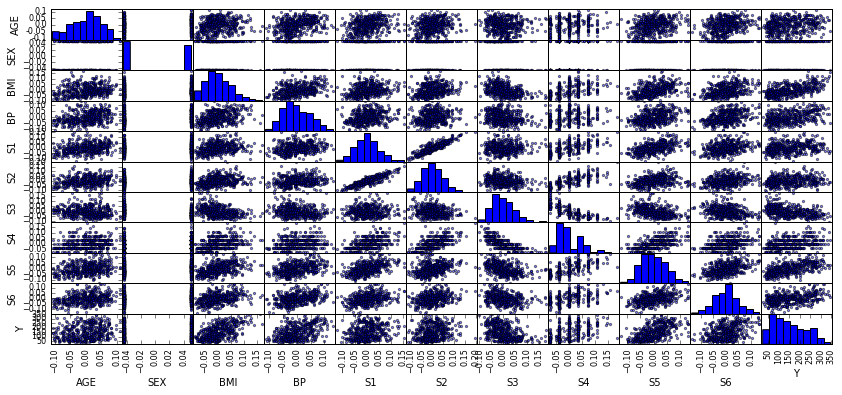

In [74]:
scatter_matrix(df,figsize=(14,6));

In [75]:
reg_diabetes = LinearRegression()
reg_diabetes.fit(diabetes.data, diabetes.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
reg_diabetes.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [77]:
reg_diabetes.intercept_

152.13348416289651

In [82]:
## Compute R^2 coefficient for predictive fit
reg_diabetes.score(diabetes.data, diabetes.target)

0.51774942541329338

### 4.1 Using training and testing data